shuffling the dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


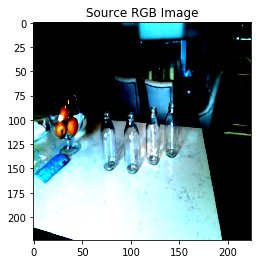

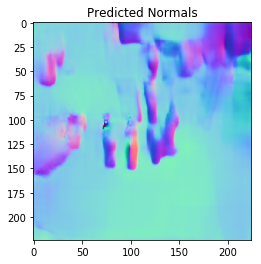

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


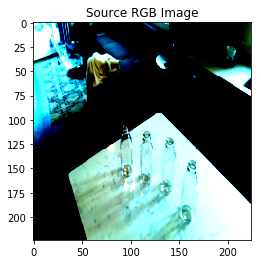

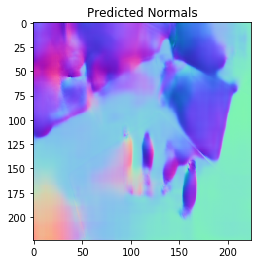

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


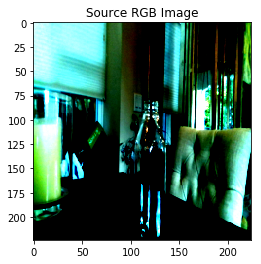

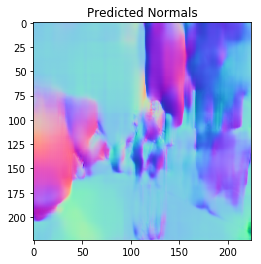

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


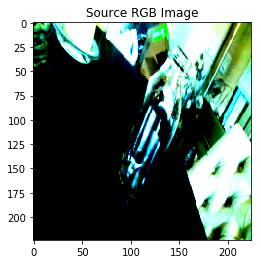

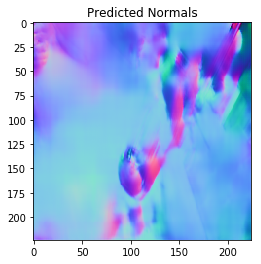

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


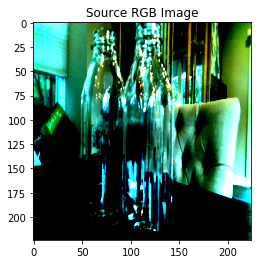

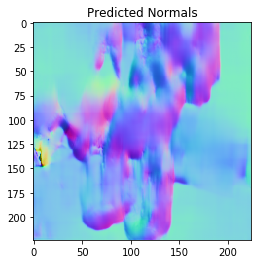

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


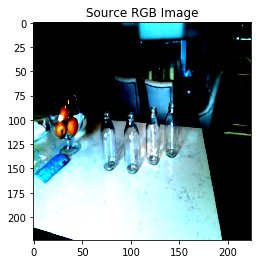

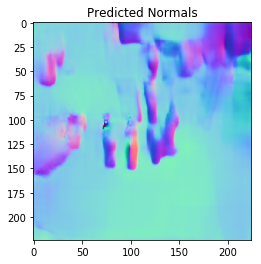

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


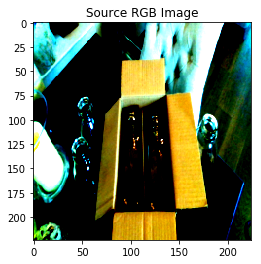

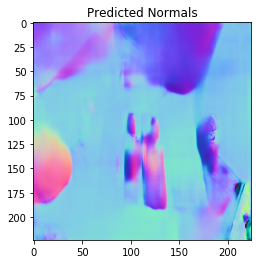

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


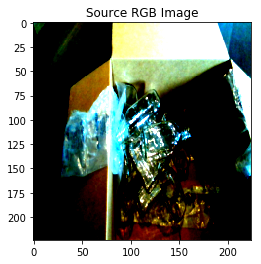

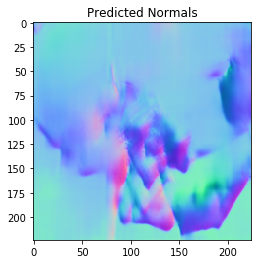

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


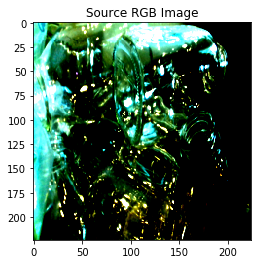

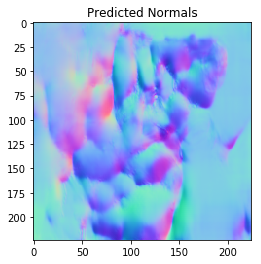

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


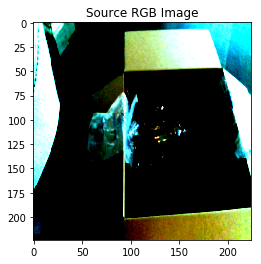

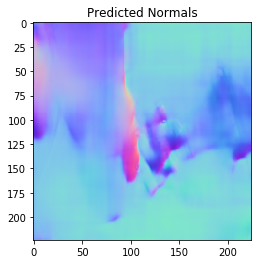

In [7]:
%matplotlib inline

import sys, os
from PIL import Image
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms
from torch.autograd import Variable
import models.unet_normals as unet
import numpy as np
from data_loader import Dataset,Options
from skimage.transform import resize

class OPT():
    def __init__(self):
        self.dataroot = './data/'
        self.file_list = './data/datalist'
        self.batchSize = 24
        self.shuffle = True
        self.phase = 'eval'
        self.num_epochs = 1000
        self.imsize = 224
        self.num_classes = int(3)
        self.gpu = '0'
        self.logs_path = 'logs/exp8'

opt = OPT()
dataloader = Dataset(opt)

device = torch.device("cuda:"+ opt.gpu if torch.cuda.is_available() else "cpu")

checkpoint_path = opt.logs_path + '/checkpoints/checkpoint-ep_25-iter_70.pth'

for i in range(1, 11):
    # Open and Transform Img
    img_not_preprocessed = np.load('data/test/test-realsense-imgs/%03d_np_color_data.npy'%(i))
    img_not_preprocessed = img_not_preprocessed[...,[2,1,0]] #Convert BGR to RGB
    img_not_preprocessed2 = transforms.ToPILImage()(img_not_preprocessed)
    img = dataloader.transformImage(img_not_preprocessed2)
    img = img.unsqueeze(0)

    # Send img to device
    img = Variable(img.to(device))

    # Load Model
    fcn = unet.Unet(num_classes=opt.num_classes)
    fcn.load_state_dict(torch.load(checkpoint_path))
    fcn.to(device)
    fcn.eval()

    # Inference
    res = fcn(img)
    res_norm = nn.functional.normalize(res, p=2, dim=1)
    output = res_norm.squeeze(0)
    output = output.data.cpu().numpy()

    # Convert Surface Normals to RGB Images
    # Predicted Normals
    camera_normal_rgb = dataloader.normals_to_rgb_with_negatives(output)
    camera_normal_rgb = np.transpose(camera_normal_rgb, (1,2,0))
    plt.imsave('data/results/test-realsense-results/%09d-normals.png'%(i), camera_normal_rgb)

    
    # Create Plots
    # Orig image
    img_r = img.squeeze(0).cpu().numpy().transpose(1,2,0)
    plt.imshow(img_r)
    plt.title('Source RGB Image')
    plt.imsave('data/results/test-realsense-results/%09d-rgb.png'%(i), img_r)
    plt.show()
    
    # Predicted Normals
    plt.imshow(camera_normal_rgb)
    plt.title('Predicted Normals') # subplot 211 title
    plt.show()
    

    